In [1]:
import pandas as pd
import numpy as np

import math as math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

### Part 1. Import and Understand Data

In [2]:
df=pd.read_csv("loan_2016.csv")

/Users/xrli/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (39,71,104) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(434415, 108)

In [4]:
df.head()

,inqlast12m,earliestcrline,secappficorangehigh,numactvrevtl,totcurbal,maxbalbc,mosinoldrevtlop,annualincjoint,term,verificationstatus,...,delinqamnt,emplength,numrevtlbalgt0,numiltl,totalbclimit,ficorangehigh,verificationstatusjoint,totalacc,issued,loanstatus
0,2.0,Mar-2002,NaN,4.0,221036.0,3381.0,168.0,NaN,36 months,Verified,...,0.0,6 years,4.0,7.0,7900.0,669.0,NaN,16.0,Mar-2016,Fully Paid
1,2.0,Nov-1999,NaN,5.0,52953.0,3789.0,196.0,NaN,36 months,Source Verified,...,0.0,9 years,5.0,3.0,15900.0,669.0,NaN,13.0,Mar-2016,Fully Paid
2,2.0,Jan-2005,NaN,3.0,62125.0,854.0,84.0,NaN,36 months,Source Verified,...,0.0,5 years,3.0,4.0,22000.0,739.0,NaN,8.0,Mar-2016,Fully Paid
3,2.0,Aug-1995,NaN,8.0,11565.0,4350.0,247.0,NaN,60 months,Not Verified,...,0.0,10+ years,8.0,3.0,17000.0,674.0,NaN,24.0,Mar-2016,Charged Off
4,1.0,Nov-1996,NaN,13.0,310728.0,6819.0,232.0,NaN,60 months,Verified,...,0.0,10+ years,10.0,4.0,51500.0,679.0,NaN,26.0,Mar-2016,Fully Paid


In [5]:
cols=df.columns.values
cols

array(['inqlast12m', 'earliestcrline', 'secappficorangehigh',
       'numactvrevtl', 'totcurbal', 'maxbalbc', 'mosinoldrevtlop',
       'annualincjoint', 'term', 'verificationstatus', 'mthssincercntil',
       'revolbal', 'accopenpast24mths', 'percentbcgt75',
       'mthssincerecentrevoldelinq', 'memberid', 'numbctl',
       'mosinrcntrevtlop', 'secappopenactil', 'numacctsever120pd',
       'mthssincelastdelinq', 'installment', 'mthssincerecentbc',
       'totcollamt', 'addrstate', 'numsats', 'mthssincelastmajorderog',
       'totalilhighcreditlimit', 'subgrade', 'inqfi',
       'secappchargeoffwithin12mths', 'openactil', 'mthssincelastrecord',
       'applicationtype', 'intrate', 'homeownership', 'revolutil',
       'emptitle', 'mortacc', 'desc', 'dti', 'openil12m', 'purpose',
       'openacc', 'secappficorangelow', 'numbcsats', 'numoprevtl',
       'mosinrcnttl', 'openrv24m', 'secappearliestcrline', 'openacc6m',
       'totalbalil', 'totalcutl', 'totalbalexmort', 'revolbaljoint',
   

### Part 2. Feature Preparation

### 2.1 Data Cleaning

#### Check missing value, drop all na columns

In [6]:
df=df.dropna(axis='columns',how='all')

In [7]:
df.shape

(434415, 94)

In [8]:
cols=df.columns.values
cols

array(['inqlast12m', 'earliestcrline', 'numactvrevtl', 'totcurbal',
       'maxbalbc', 'mosinoldrevtlop', 'annualincjoint', 'term',
       'verificationstatus', 'mthssincercntil', 'revolbal',
       'accopenpast24mths', 'percentbcgt75', 'mthssincerecentrevoldelinq',
       'numbctl', 'mosinrcntrevtlop', 'numacctsever120pd',
       'mthssincelastdelinq', 'installment', 'mthssincerecentbc',
       'totcollamt', 'addrstate', 'numsats', 'mthssincelastmajorderog',
       'totalilhighcreditlimit', 'subgrade', 'inqfi', 'openactil',
       'mthssincelastrecord', 'applicationtype', 'intrate',
       'homeownership', 'revolutil', 'emptitle', 'mortacc', 'desc', 'dti',
       'openil12m', 'purpose', 'openacc', 'numbcsats', 'numoprevtl',
       'mosinrcnttl', 'openrv24m', 'openacc6m', 'totalbalil', 'totalcutl',
       'totalbalexmort', 'bcutil', 'grade', 'ilutil', 'delinq2yrs',
       'numtl30dpd', 'pcttlnvrdlq', 'mthssincerecentinq',
       'numtloppast12m', 'loanamnt', 'collections12mthsexmed', '

### 2.2 Group Obj/Num Featureus

In [9]:
df.info()
#74 floasts, 20 objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434415 entries, 0 to 434414
Data columns (total 94 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   inqlast12m                  434345 non-null  float64
 1   earliestcrline              434407 non-null  object 
 2   numactvrevtl                434407 non-null  float64
 3   totcurbal                   434407 non-null  float64
 4   maxbalbc                    434346 non-null  float64
 5   mosinoldrevtlop             434407 non-null  float64
 6   annualincjoint              8789 non-null    float64
 7   term                        434407 non-null  object 
 8   verificationstatus          434407 non-null  object 
 9   mthssincercntil             422649 non-null  float64
 10  revolbal                    434407 non-null  float64
 11  accopenpast24mths           434407 non-null  float64
 12  percentbcgt75               429742 non-null  float64
 13  mthssincerecen

In [10]:
num_feature=[]
obj_feature=[]
for col in cols:
    if df[col].dtype == 'object':
        obj_feature.append(col)
    else:
        num_feature.append(col)

In [11]:
print(len(num_feature))
sorted(num_feature)

74


['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'fundedamnt',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'openrv24m',
 'pcttlnvrdlq',
 'p

In [12]:
print (len(obj_feature))
sorted(obj_feature)

20


['addrstate',
 'applicationtype',
 'desc',
 'earliestcrline',
 'emplength',
 'emptitle',
 'grade',
 'homeownership',
 'id',
 'initialliststatus',
 'intrate',
 'issued',
 'loanstatus',
 'purpose',
 'revolutil',
 'subgrade',
 'term',
 'verificationstatus',
 'verificationstatusjoint',
 'zipcode']

### Part 3. Data Exploration

In [13]:
df.isna().sum()
# mthssincelastdelinq       26929, num
# desc                      13296, obj
# mthssincelastrecord       38887, num

inqlast12m                     70
earliestcrline                  8
numactvrevtl                    8
totcurbal                       8
maxbalbc                       69
                            ...  
ficorangehigh                   8
verificationstatusjoint    425626
totalacc                        8
issued                          8
loanstatus                      8
Length: 94, dtype: int64

### 3.1 Obj Features(20) 

In [14]:
i=14
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
# has null value; 0% means?  over 100% means?

Category:  14 , id 
 Missing values:  0


#### 1) grade/subgrade

Category:  12 , grade 
 Missing values:  8


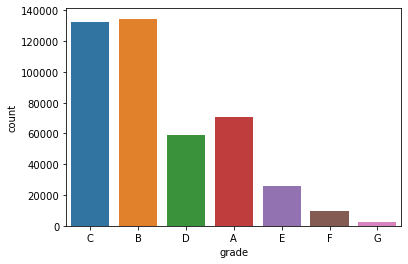

In [15]:
i=12
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
sns.countplot(x=obj_feature[i], data=df)
# grade有顺序的，a~g 变成 0~6

Category:  4 , subgrade 
 Missing values:  8


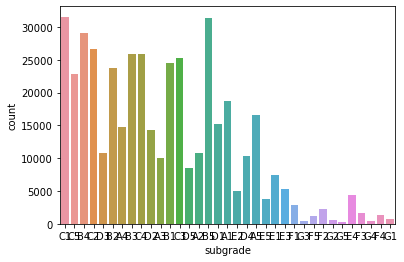

In [16]:
i=4
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
sns.countplot(x=obj_feature[i], data=df)

#### 2) term

Category:  1 , term 
 Missing values:  8


 36 months    323495
 60 months    110912
Name: term, dtype: int64

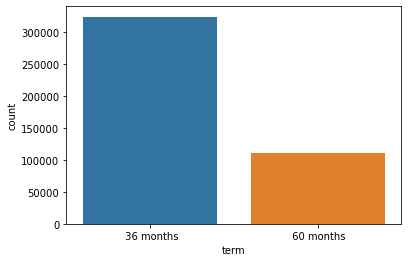

In [17]:
i=1
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
sns.countplot(x=obj_feature[i], data=df)
df[obj_feature[i]].value_counts()
# 36m more common than 60m, in this df, use 36m only.

#### 3) emplength/emptitle

In [18]:
i=16
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
# 0,1,2 或者one hot encoding, 分成三列

# n/a consistent with n/a at employment title
# 11 values,  convert to num
# na ->-999

Category:  16 , emplength 
 Missing values:  28222


10+ years    149972
2 years       39601
3 years       34734
< 1 year      31918
1 year        29156
5 years       26475
4 years       25820
8 years       18774
6 years       18656
9 years       16884
7 years       14203
Name: emplength, dtype: int64

In [19]:
i=9
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
# Null values means not working? 
# 合并rn, registered nurse.
# label encoding/frequency encoding. simple NLP

Category:  9 , emptitle 
 Missing values:  28501


Teacher                                  8248
Manager                                  7403
Owner                                    5007
Registered Nurse                         3381
RN                                       3282
                                         ... 
Telecommunications Network Engineer         1
VP Network/System Engineer                  1
driver coordinator                          1
Facility Director/ Director of Tennis       1
Business Developement Rep                   1
Name: emptitle, Length: 121663, dtype: int64

#### 4) demo: addrstate/zipcode

In [20]:
i=3
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
#50 states, leave-one-out encoding/frequency encoding

Category:  3 , addrstate 
 Missing values:  8


CA    57888
TX    37036
NY    35505
FL    31727
IL    17715
NJ    15891
OH    14999
PA    14502
GA    14459
NC    12279
VA    11687
MI    11604
AZ    10462
MD    10071
MA     9830
CO     8798
WA     8301
MN     7699
IN     7658
TN     7272
MO     6951
CT     6794
NV     6164
WI     5791
SC     5492
AL     5329
LA     4985
OR     4669
KY     4225
OK     4061
KS     3567
AR     3335
MS     2867
UT     2796
NM     2286
NE     2116
NH     2097
HI     2019
RI     1881
ME     1409
DE     1252
ID     1225
MT     1172
ND     1051
AK     1006
DC      958
VT      942
WY      935
SD      879
WV      770
Name: addrstate, dtype: int64

In [21]:
i=13
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
#xx去掉 变成数值；frequency encoding

Category:  13 , zipcode 
 Missing values:  8


750xx    4571
945xx    4475
112xx    4416
606xx    4104
300xx    3959
         ... 
965xx       1
203xx       1
525xx       1
521xx       1
552xx       1
Name: zipcode, Length: 911, dtype: int64

#### 5) num: intrate/revolutil

In [22]:
i=6
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()

Category:  6 , intrate 
 Missing values:  8


  5.32%    18722
 11.49%    17432
 13.99%    15192
 11.99%    14545
 13.49%    14002
           ...  
 21.99%        2
 26.77%        2
 25.99%        2
 13.19%        1
 11.16%        1
Name: intrate, Length: 141, dtype: int64

In [23]:
i=8
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
#去掉百分号，变成float

Category:  8 , revolutil 
 Missing values:  272


0%        1828
57%        955
55%        942
48%        935
61%        905
          ... 
111.7%       1
107.7%       1
110.6%       1
128.6%       1
126.6%       1
Name: revolutil, Length: 1178, dtype: int64

#### 6) type:applicationtype/verificationstatus/verificationstatusjoint/initialliststatus

Category:  5 , applicationtype 
 Missing values:  8


Individual    425618
Joint App       8789
Name: applicationtype, dtype: int64

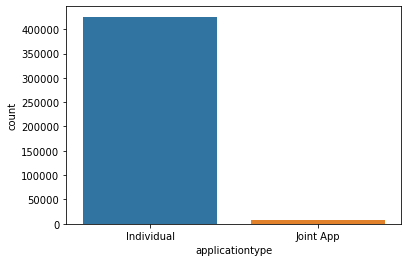

In [24]:
i=5
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
sns.countplot(x=obj_feature[i], data=df)
df[obj_feature[i]].value_counts()
# Mainly individual, 2% joint app. consistent with 'verificationstatusjoint', 
# means that it only has one variance 'not verified', thus can be excluded from modeling.

Category:  2 , verificationstatus 
 Missing values:  8


Source Verified    0.417385
Not Verified       0.291908
Verified           0.290707
Name: verificationstatus, dtype: float64

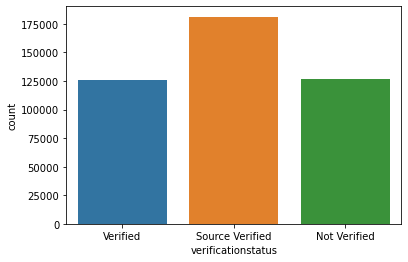

In [25]:
i=2
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
sns.countplot(x=obj_feature[i], data=df)
df[obj_feature[i]].value_counts(normalize=True)


In [26]:
i=17
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
# more than 50% debt_consolidation
# one hot encoding

Category:  17 , verificationstatusjoint 
 Missing values:  425626


Not Verified    8789
Name: verificationstatusjoint, dtype: int64

In [27]:
i=15
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()


Category:  15 , initialliststatus 
 Missing values:  8


w    333732
f    100675
Name: initialliststatus, dtype: int64

#### 7) date: earliestcrline/issued

In [28]:
i=0
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()

# 信用长短, convert to time difference, eg, months to 2019 -> a numeric feature
# late, it might be not reliable for short period of credit behavior; 
# early->old lender.

Category:  0 , earliestcrline 
 Missing values:  8


Sep-2003    3273
Aug-2003    3273
Sep-2004    3224
Sep-2005    3126
Aug-2004    3106
            ... 
Jul-1961       1
Jun-1961       1
Apr-1962       1
Feb-1962       1
Jul-1952       1
Name: earliestcrline, Length: 670, dtype: int64

In [29]:
i=18
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
# train/test split, 1-9 train, 10-12 test.

Category:  18 , issued 
 Missing values:  8


Mar-2016    61992
Feb-2016    39529
Apr-2016    36432
Aug-2016    36280
Dec-2016    36183
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Jan-2016    32366
May-2016    28403
Sep-2016    28144
Name: issued, dtype: int64

In [30]:
#print (df[df[obj_feature[8]].isnull() ==0][obj_feature[8]])

#### 8) purpose/homeownership/loanstatus

In [31]:
i=11
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()

Category:  11 , purpose 
 Missing values:  8


debt_consolidation    248899
credit_card            91609
home_improvement       31182
other                  28469
major_purchase         10406
medical                 5440
car                     4813
small_business          4790
vacation                3262
moving                  3229
house                   2002
renewable_energy         304
wedding                    2
Name: purpose, dtype: int64

Category:  7 , homeownership 
 Missing values:  8


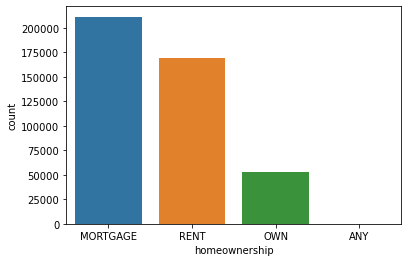

In [32]:
i=7
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()
sns.countplot(x=obj_feature[i], data=df)

In [33]:
i=19
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
df[obj_feature[i]].value_counts()

Category:  19 , loanstatus 
 Missing values:  8


Fully Paid            283148
Charged Off            74151
Current                72512
Late (31-120 days)      2739
In Grace Period         1217
Late (16-30 days)        633
Default                    7
Name: loanstatus, dtype: int64

#### 9) NLP: desc

In [34]:
i=10
print ("Category: ",i,",",obj_feature[i],"\n",
       "Missing values: ",df[obj_feature[i]].isna().sum())
# only 23 not null values and 6 of them are space. simply drop it
# in the 2014 data, there are more not null data in this column, you might want to drop it/
# or classify them to null and not_null, short v.s. long
# this part might be quite similar to the purpose feature, which is quite important.

Category:  10 , desc 
 Missing values:  434392


### 3.2 Numeric features (74)

#### For an issued loan, fundedamnt=loanamnt, drop fundedamnt¶

In [35]:
df[['fundedamnt','loanamnt']][:10]

,fundedamnt,loanamnt
0,12800.0,12800.0
1,9000.0,9000.0
2,8000.0,8000.0
3,25000.0,25000.0
4,35000.0,35000.0
5,20000.0,20000.0
6,15000.0,15000.0
7,6000.0,6000.0
8,5625.0,5625.0
9,16000.0,16000.0


<ipython-input-36-dc26ff7a684f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)


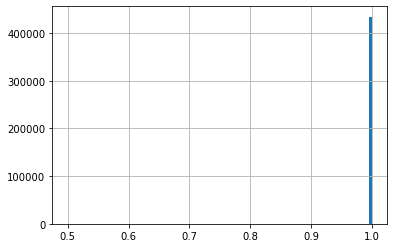

In [36]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)

In [37]:
df.drop('fundedamnt',axis=1,inplace=True)

#### histogram

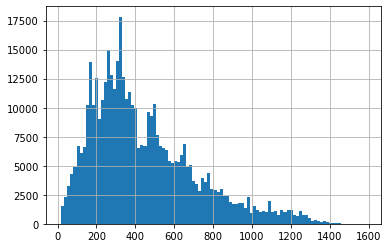

In [38]:
df.installment.hist(bins=100)
#150~380

#### mean response

In [39]:
df.loanstatus.value_counts()

Fully Paid            283148
Charged Off            74151
Current                72512
Late (31-120 days)      2739
In Grace Period         1217
Late (16-30 days)        633
Default                    7
Name: loanstatus, dtype: int64

In [40]:
df_select=df.query('loanstatus=="Fully Paid" or loanstatus=="Charged Off"')

In [41]:
df_select.loanstatus=df_select.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})
df_select.loanstatus.value_counts()

/Users/xrli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    283148
1     74151
Name: loanstatus, dtype: int64

#### categorical data vs loanstatus

In [42]:
sorted(num_feature)

['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'fundedamnt',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'openrv24m',
 'pcttlnvrdlq',
 'p

In [43]:
dummy_list = ['grade', 'subgrade','addrstate',
              'homeownership', 'emplength',
              'verificationstatus','applicationtype', 'initialliststatus',
              'delinq2yrs','openacc']
              
n = len(dummy_list);n

10

In [44]:
np.sort(df_select.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [45]:
df_select.emplength.value_counts()

10+ years    121143
2 years       32942
3 years       28847
< 1 year      26763
1 year        24353
5 years       21929
4 years       21287
8 years       15556
6 years       15313
9 years       13929
7 years       11604
Name: emplength, dtype: int64

In [46]:
df_select.emplength=df_select.emplength.map({"10+ years":10, "< 1 year":0, 
                                             "1 year":1, "2 years":2, "3 years":3, "4 years":4, "5 years":5,
                                             "6 years":6, "7 years":7, "8 years":8, "9 years":9})

In [47]:
df_select.emplength.value_counts()

10.0    121143
2.0      32942
3.0      28847
0.0      26763
1.0      24353
5.0      21929
4.0      21287
8.0      15556
6.0      15313
9.0      13929
7.0      11604
Name: emplength, dtype: int64

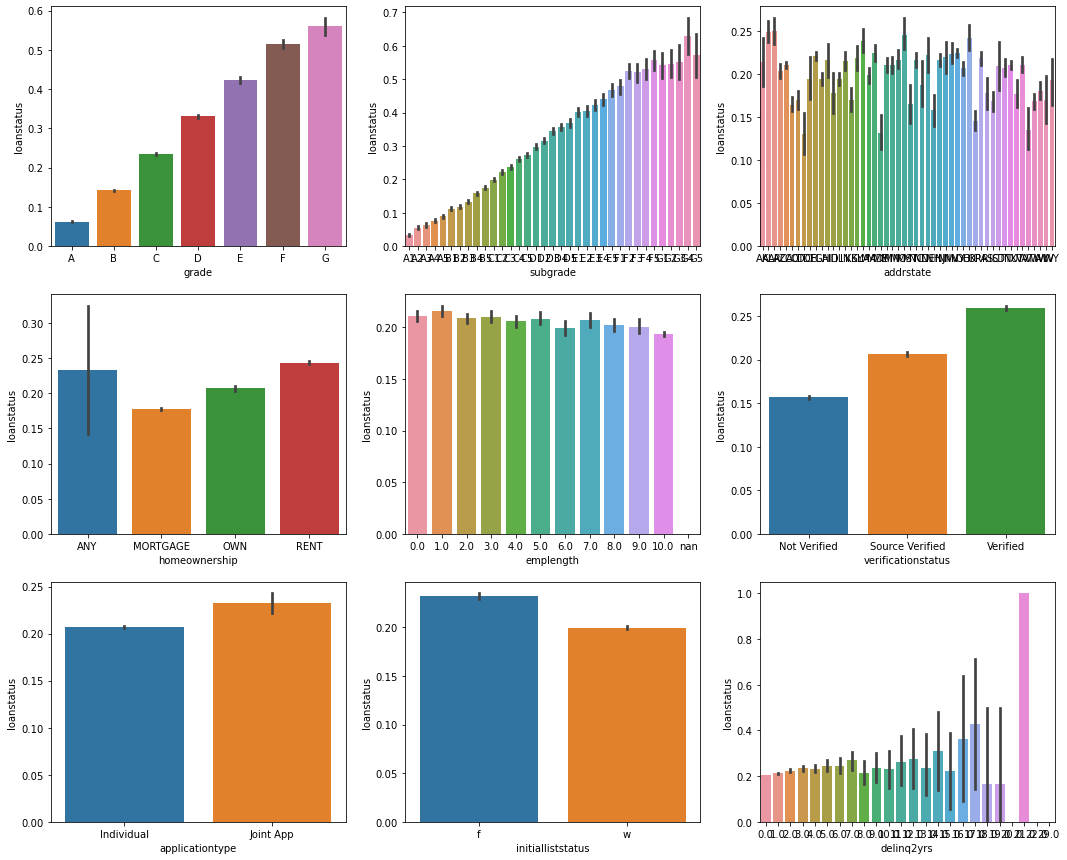

In [48]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

i=0
m=0
for i in range(len(dummy_list)-1):
    while m<3:
        n=0
        while n<3:
            sns.barplot(ax=axes[m, n], data=df_select, x=dummy_list[i], y='loanstatus',
                        order=np.sort(df_select[dummy_list[i]].unique()))
            i=i+1
            n=n+1
        m=m+1

In [49]:
# higher grade -> higher chances of default, applies to subgrade as well.
# other,rent > mortage, own -> higher chances of default
# shorter length of employmnet not necessatily result in higher chances of getting default.
# why verified has higher chances of default?
# why joint app has higher chances of default?

#### numerical data vs default rate

In [50]:
num_feature=sorted(num_feature)
num_feature

['accnowdelinq',
 'accopenpast24mths',
 'allutil',
 'annualinc',
 'annualincjoint',
 'avgcurbal',
 'bcopentobuy',
 'bcutil',
 'chargeoffwithin12mths',
 'collections12mthsexmed',
 'delinq2yrs',
 'delinqamnt',
 'dti',
 'dtijoint',
 'ficorangehigh',
 'ficorangelow',
 'fundedamnt',
 'ilutil',
 'inqfi',
 'inqlast12m',
 'inqlast6mths',
 'installment',
 'loanamnt',
 'maxbalbc',
 'mortacc',
 'mosinoldilacct',
 'mosinoldrevtlop',
 'mosinrcntrevtlop',
 'mosinrcnttl',
 'mthssincelastdelinq',
 'mthssincelastmajorderog',
 'mthssincelastrecord',
 'mthssincercntil',
 'mthssincerecentbc',
 'mthssincerecentbcdlq',
 'mthssincerecentinq',
 'mthssincerecentrevoldelinq',
 'numacctsever120pd',
 'numactvbctl',
 'numactvrevtl',
 'numbcsats',
 'numbctl',
 'numiltl',
 'numoprevtl',
 'numrevaccts',
 'numrevtlbalgt0',
 'numsats',
 'numtl120dpd2m',
 'numtl30dpd',
 'numtl90gdpd24m',
 'numtloppast12m',
 'openacc',
 'openacc6m',
 'openactil',
 'openil12m',
 'openil24m',
 'openrv12m',
 'openrv24m',
 'pcttlnvrdlq',
 'p

In [51]:
len(num_feature)

74